In [9]:
from typing import Any, Optional, Tuple
!apt-get install graphviz
!pip install graphviz
import graphviz
from collections import deque

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [33]:

class Node:

    def __init__(self, name: str, year, Wear, Dear, Fear, DPear, FPear) -> None:
        self.name = name
        self.left: Optional["Node"] = None
        self.right: Optional["Node"] = None
        self.year = year
        self.Wear = Wear
        self.Dear = Dear
        self.Fear = Fear
        self.DPear = DPear
        self.FPear = FPear
        self.balance = 0
        self.level = 0

class BinaryTree:

    def __init__(self, root: Optional["Node"] = None) -> None:
        self.root = root

    #Algoritmo de altura
    def height(self, node: Optional["Node"]) -> int:
      if node is None:
        return 0
      else:
        return 1 + max(self.height(node.left), self.height(node.right))

    #Algoritmo de calculacion de balance
    def balance(self, node: Optional["Node"]) -> None:
      if node is not None:
        node.balance = self.height(node.right) - self.height(node.left)
      return

    #Algoritmo de busqueda. Busca la existencia de un elemento y regresa su padre.
    def search(self, elem: str) -> Tuple[Optional["Node"], Optional["Node"]]:
        p, pad = self.root, None
        while p is not None:
            if elem == p.name:
                return p, pad
            else:
                pad = p
                if elem < p.name:
                    p = p.left
                else:
                    p = p.right
        return p, pad

    #Algoritmo que regresa el padre de un nodo
    def parent(self, elem: str) -> Optional["Node"]:
        p, pad = self.search(elem)
        return pad

    #Algoritmo que regresa al abuelo de un nodo
    def grandparent(self, elem: str) -> Tuple[Optional["Node"], Optional["Node"]]:
        p = self.parent(elem)
        if p is None:
            return None
        else:
            return self.parent(p.name), p

    #Algoritmo que regresa el tio de un nodo
    def uncle(self, elem: str) -> Optional["Node"]:
        g, p = self.grandparent(elem)
        if g is None:
            return None
        if g.left == p:
            return g.right
        else:
            return g.left


    #Los algoritmos de los 4 tipos de rotacion
    def simp_lr(self, node: Optional["Node"]) -> Optional["Node"]:
      aux = node.right
      node.right = aux.left
      aux.left = node
      return aux
    def simp_rr(self, node: Optional["Node"]) -> Optional["Node"]:
      aux = node.left
      node.left = aux.right
      aux.right = node
      return aux
    def doub_rlr(self, node: Optional["Node"]) -> Optional["Node"]:
      node.right = self.simp_rr(node.right)
      return self.simp_lr(node)
    def doub_lrl(self, node: Optional["Node"]) -> Optional["Node"]:
      node.left = self.simp_lr(node.left)
      return self.simp_rr(node)

    #Algoritmo de balanceo
    def balanceo(self, node: Optional["Node"]) -> None:
      if node is None:
        return
      self.balance(node) #Recalcula el balance del nodo
      m = self.parent(node.name)
      if node.balance == -2: #Verifica si hay desbalance y que caso de rotacion hay que hacer
        if node.left.balance == 1:
          p = self.doub_lrl(node)
        else:
          p = self.simp_rr(node)
        if m is None:
          self.root = p
        else:
          if m.left == node:
            m.left = p
          else:
            m.right = p
      elif node.balance == 2:
        if node.right.balance == -1:
          p = self.doub_rlr(node)
        else:
          p = self.simp_lr(node)
        if m is None:
          self.root = p
        else:
          if m.left == node:
            m.left = p
          else:
            m.right = p
      self.balanceo(m) #Continua recalculando el balance de los ascendentes hasta llegar a la raiz
      return

    #Insercion de nodo
    def add_node(self, name: str, year, Wear, Dear, Fear, DPear, FPear):
        to_insert = Node(name, year, Wear, Dear, Fear, DPear, FPear)
        if self.root is None:
            self.root = to_insert
        else:
            p, pad = self.search(name)
            if p is not None:
              return False
            else:
              to_insert.level = pad.level + 1
              if pad.name > name: #El nombre funciona como metrica
                pad.left = to_insert
              else:
                pad.right = to_insert
              self.balanceo(pad) #Se balancean inmediatamente los ascendentes del nuevo nodo
              return True

    #Eliminacion de nodo
    def delete_node(self, name):
        p, pad = self.search(name)
        if p is not None:
          son_c = 0 #son_c cuenta cuantos hijos tiene el nodo a eliminar
          son_m = None #son_m sera la memoria del hijo visitado, util para caso con 1 solo hijo
          if p.left is not None:
            son_c += 1
            son_m = p.left
          if p.right is not None:
            son_c += 1
            son_m = p.right
          if son_c == 0: #Caso donde el nodo no tiene hijos
            if self.root == p:
              self.root = None
            else:
              if pad.left == p:
                pad.left = None
              else:
                pad.right = None
            del p
          elif son_c == 1: #Caso donde el nodo tiene un solo hijo. son_m recuerda quien es ese hijo
            if self.root == p:
              self.root = son_m
            else:
              if pad.left == p:
                pad.left = son_m
              else:
                pad.right = son_m
            del p
          else: #Caso que nodo tenga ambos hijos, lo hacemos por sucesor
            aux, pad_aux = p.right, p
            while aux.left is not None:
              aux, pad_aux = aux.left, aux
            p.name = aux.name #Reubicamos la informacion del nodo
            p.year = aux.year
            p.Wear = aux.Wear
            p.Dear = aux.Dear
            p.Fear = aux.Fear
            p.DPear = aux.DPear
            p.FPear = aux.FPear
            aux.left = p.left
            if pad_aux == p:
              pad_aux.right = aux.right
            else:
              pad_aux.left = aux.right
            del aux
            pad = pad_aux #Se le asigna el padre del nodo eliminado a pad para facilitar el balance a continuacion
          self.balanceo(pad) #Se balancea inmediatamente los ascendentes del nodo eliminado
          return True
        return False

    #Busqueda especifica
    def esp_search(self, y, f):
      s = []
      met = []
      p = self.root
      #Hacemos una busqueda por inorden iterativo
      while p is not None or len(s) > 0:
          if p is not None: #Para cada elemento se revisa si cumple con las condiciones
              if y == p.year and p.Fear > f and p.FPear > p.DPear:
                met.append(p)
              s.append(p)
              p = p.left
          else:
              p = s.pop()
              p = p.right
      return met

    # Método para leer el árbol por niveles (BFS)
    def leer_por_niveles(self):
        if self.root is None:
            return []

        niveles = []
        cola = deque([self.root])  # Cola para realizar el recorrido BFS

        while cola:
            nivel_actual = []
            tamaño_nivel = len(cola)  # Número de nodos en el nivel actual

            for _ in range(tamaño_nivel):
                nodo = cola.popleft()  # Sacar el nodo de la cola
                nivel_actual.append(nodo.name)  # Agregar el valor del nodo al nivel actual

                if nodo.left:
                    cola.append(nodo.left)  # Agregar el hijo izquierdo a la cola
                if nodo.right:
                    cola.append(nodo.right)  # Agregar el hijo derecho a la cola

            niveles.append(nivel_actual)  # Agregar el nivel actual a la lista de niveles

        return niveles

    # Método para visualizar el árbol en un gráfico
    def display_tree(self) -> None:
      dot = self.visualize()
      display(dot)  # Muestra el gráfico en Colab
      return

    # Método para visualizar el árbol usando Graphviz
    def visualize(self):
        dot = graphviz.Digraph(comment='Árbol AVL')
        dot.attr('node', shape='ellipse')
        self._add_edges(self.root, dot)
        dot.render('avl', format='png', cleanup=False)  # Guarda el gráfico como archivo PNG
        return dot

    # Método recursivo para agregar bordes en la visualización
    def _add_edges(self, node, dot):
        if node is not None:
            if node.left:
                dot.edge(node.name, node.left.name)
                self._add_edges(node.left, dot)
            else:
                # Agregar un nodo vacío en el lado izquierdo
                dot.node(f'{node.name}_L', label='', shape='point', width='0', height='0')
                dot.edge(node.name, f'{node.name}_L')

            if node.right:
                dot.edge(node.name, node.right.name)
                self._add_edges(node.right, dot)
            else:
                # Agregar un nodo vacío en el lado derecho
                dot.node(f'{node.name}_R', label='', shape='point', width='0', height='0')
                dot.edge(node.name, f'{node.name}_R')
        return
    #Funcion que meti para hacerme la vida facil
    def movie(self, title):
      movie_row = df[df['Title'].str.lower() == title.lower()]

      if not movie_row.empty:
        row = movie_row.iloc[0]
        year = int(row['Year'])
        worldwide_earnings = int(row['Worldwide Earnings'])
        domestic_earnings = int(row['Domestic Earnings'])
        foreign_earnings = int(row['Foreign Earnings'])
        domestic_percent_earnings = float(row['Domestic Percent Earnings'])
        foreign_percent_earnings = float(row['Foreign Percent Earnings'])

        if self.add_node(title, year, worldwide_earnings, domestic_earnings, foreign_earnings, domestic_percent_earnings, foreign_percent_earnings):
            print(f"Se añadió la película: {title}")
        else:
            print(f"La película {title} ya existe en el árbol.")

        self.display_tree()


In [32]:
def opMenu(met, pel: Optional["Node"]) -> None:
  if len(met) == 0 and pel == None:
    print("No hay nodos para operar")
    return
  print("Nodos disponibles para operar: ")
  con = 1
  if len(met) != 0:
    for i in met:
      print(f"{con}. {i.name}")
      con += 1
  if pel != None:
    print(f"{con}. {pel.name}")
    con += 1
  elec = int(input("Digite el numero de la pelicula a operar: "))
  while elec not in range(1, con):
    elec = int(input("Digite un numero valido"))
  if pel == None or elec < con - 1:
    pel = met[elec - 1]
  print("1. Hallar el nivel del nodo")
  print("2. Obtener el factor de balanceo del nodo")
  print("3. Hallar el padre del nodo")
  print("4. Hallar el abuelo del nodo")
  print("5. Hallar el tio del nodo")
  print("6. Salir")
  op = int(input("Digite la operacion a realizar: "))
  while op not in range(1,7):
    op = int(input("Digite una operacion valida: "))
  if op == 1:
    print(pel.level)
  elif op == 2:
    print(pel.balance)
  elif op == 3:
    m = P.parent(pel.name)
    if m == None:
      print("No tiene padre")
    else:
      print(m.name)
  elif op == 4:
    m, p = P.grandparent(pel.name)
    if m == None:
      print("No tiene abuelo")
    else:
      print(m.name)
  elif op == 5:
    m = P.uncle(pel.name)
    if m == None:
      print("No tiene tio")
    else:
      print(m.name)
  return


def comandos() -> None:
  print("Digite 1 para agregar una pelicula")
  print("Digite 2 para eliminar una pelicula")
  print("Digite 3 para buscar una pelicula")
  print("Digite 4 buscar una pelicula bajo los parametros")
  print("Digite 5 para hacer un recorrido por niveles")
  print("Digite 6 para abrir el menu de operaciones")
  print("Digite 8 para salir - ")

P = BinaryTree()
comandos()
m = int(input("Digite 7 para leer los comandos disponibles: "))
met = []
pel = None
while True: #Diseñamos un menu para exponer las distintas funciones
  while m not in range(1,9):
    m = int(input("Digite un numero valido: "))
  if m == 1:
    title = input("Ingrese el título de la película que desea agregar: ")

    movie_row = df[df['Title'].str.lower() == title.lower()]

    if not movie_row.empty:
        row = movie_row.iloc[0]
        title = str(row["Title"])
        year = int(row['Year'])
        worldwide_earnings = int(row['Worldwide Earnings'])
        domestic_earnings = int(row['Domestic Earnings'])
        foreign_earnings = int(row['Foreign Earnings'])
        domestic_percent_earnings = float(row['Domestic Percent Earnings'])
        foreign_percent_earnings = float(row['Foreign Percent Earnings'])

        if P.add_node(title, year, worldwide_earnings, domestic_earnings, foreign_earnings, domestic_percent_earnings, foreign_percent_earnings):
            print(f"Se añadió la película: {title}")
        else:
            print(f"La película {title} ya existe en el árbol.")

        P.display_tree()
    else:
        print(f"No se encontró la película con el título '{title}' en la base de datos.")

  elif m == 2:
    name = input("Digite el nombre de la pelicula a eliminar - ")
    if P.delete_node(name):
      P.display_tree()
      print("Se elimino la pelicula")

    else:
      print("No se encontro la pelicula")
  elif m == 3:
    name = input("Digite el nombre de la pelicula a buscar - ")
    pel = P.search(name)
    if pel[0] != None:
      pel = pel[0]
      print("Se encontro la pelicula")
    else:
      print("No se encontro la pelicula")
  elif m == 4:
    print("Se va a buscar peliculas sobre un año especificado, cuyo porcentaje de ganancias a nivel nacional sea menor que a nivel internacional, y cuyas ganancias internacionales sean mayores a un numeros especificado")
    y = int(input("Digite el año: "))
    f = int(input("Digite la cota inferior de ganancias a nivel internacional: "))
    met = P.esp_search(y, f)
    if len(met) == 0:
      print("No se encontraron peliculas")
    else:
      print("Se encontraron las siguientes peliculas:")
      for i in met:
        print(i.name)
  elif m == 5:
    niveles = P.leer_por_niveles()
    for i in niveles:
      print(i)
  elif m == 6:
    opMenu(met, pel)
  elif m == 7:
    comandos()
  elif m == 8:
    break
  m = int(input("Digite 7 para leer los comandos disponibles: "))


Digite 1 para agregar una pelicula
Digite 2 para eliminar una pelicula
Digite 3 para buscar una pelicula
Digite 4 buscar una pelicula bajo los parametros
Digite 5 para hacer un recorrido por niveles
Digite 6 para abrir el menu de operaciones
Digite 8 para salir - 
Digite 7 para leer los comandos disponibles: 8


La película dinosaur ya existe en el árbol.


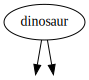

Se añadió la película: cast away


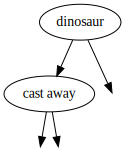

Se añadió la película: what women want


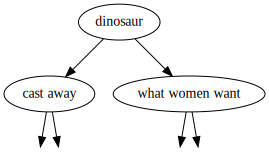

Se añadió la película: the perfect score


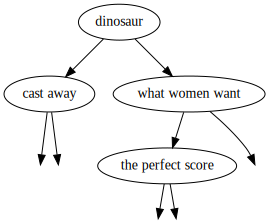

Se añadió la película: loser


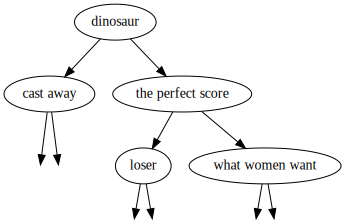

Se añadió la película: bait


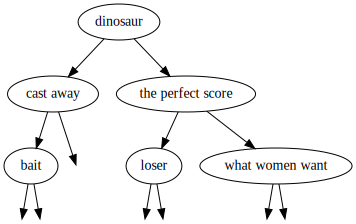

Se añadió la película: the pianist


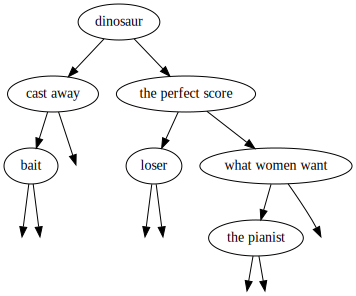

Se añadió la película: high crimes


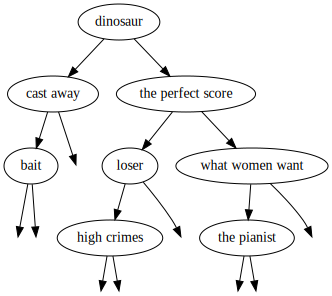

Se añadió la película: pinocchio


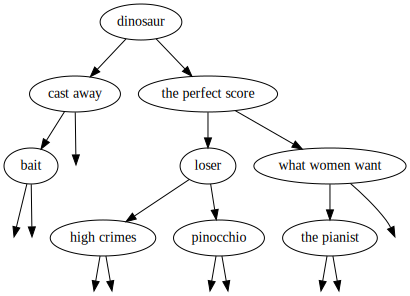

Se añadió la película: van wilder


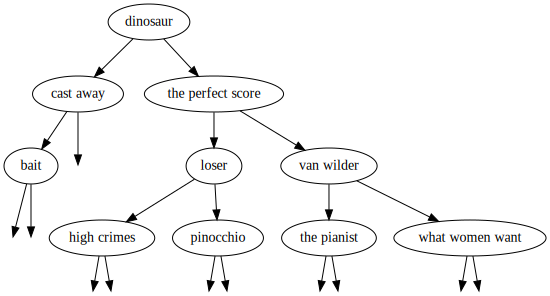

Se encontraron las siguientes peliculas:
dinosaur
what women want
['dinosaur']
['cast away', 'the perfect score']
['bait', 'loser', 'van wilder']
['high crimes', 'pinocchio', 'the pianist', 'what women want']


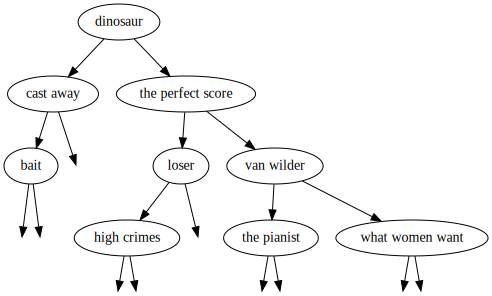

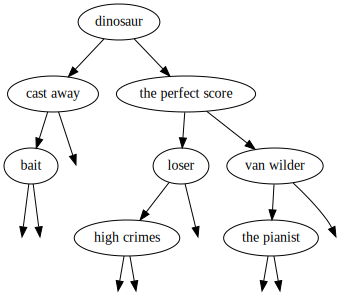

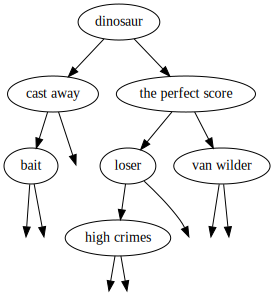

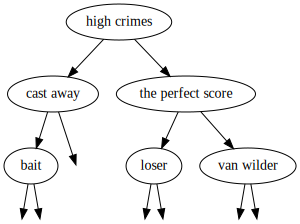

Se añadió la película: mohou0han


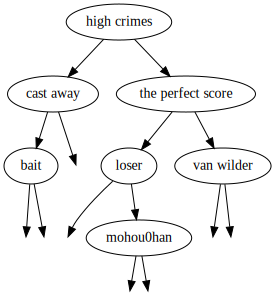

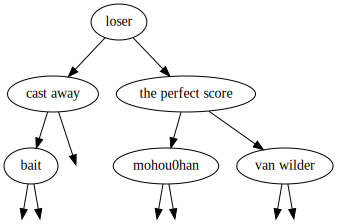

In [35]:
T = BinaryTree()
T.movie("dinosaur")
T.movie("cast away")
T.movie("what women want")
T.movie("the perfect score")
T.movie("loser")
T.movie("bait")
T.movie("the pianist")
T.movie("high crimes")
T.movie("pinocchio")
T.movie("van wilder")
met = T.esp_search(2000, 10)
if len(met) == 0:
    print("No se encontraron peliculas")
else:
    print("Se encontraron las siguientes peliculas:")
    for i in met:
      print(i.name)
niveles = T.leer_por_niveles()
for i in niveles:
  print(i)
T.delete_node("pinocchio")
T.display_tree()
T.delete_node("what women want")
T.display_tree()
T.delete_node("the pianist")
T.display_tree()
T.delete_node("dinosaur")
T.display_tree()
T.movie("mohou0han")
T.delete_node("high crimes")
T.display_tree()

In [3]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


In [4]:
from google.colab import files

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Ruta David Alejandro
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/dataset_movies.xlsx")
df.shape

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset_movies.xlsx'

In [6]:
#Ruta Alejandro David
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Diabetes/dataset_movies.xlsx")
df.shape

(4953, 7)

In [ ]:
df.dtypes
print(df.dtypes)

Title                         object
Worldwide Earnings             int64
Domestic Earnings              int64
Domestic Percent Earnings    float64
Foreign Earnings               int64
Foreign Percent Earnings     float64
Year                           int64
dtype: object


In [7]:
df.head(1000)

,Title,Worldwide Earnings,Domestic Earnings,Domestic Percent Earnings,Foreign Earnings,Foreign Percent Earnings,Year
0,Mission: Impossible II,546388108,215409889,39.4,330978219,60.6,2000
1,Gladiator,460583960,187705427,40.8,272878533,59.2,2000
2,Cast Away,429632142,233632142,54.4,196000000,45.6,2000
3,What Women Want,374111707,182811707,48.9,191300000,51.1,2000
4,Dinosaur,349822765,137748063,39.4,212074702,60.6,2000
...,...,...,...,...,...,...,...
995,Connie and Carla,11341016,8085771,71.3,3255245,28.7,2004
996,Naruto the Movie: Ninja Clash in the Land of Snow,11141307,0,0.0,11141307,100.0,2004
997,Head0On,11030861,435395,3.9,10595466,96.1,2004
998,District B13,10976892,1200216,10.9,9776676,89.1,2004
